# Exercise 5
*CS-E5885 Modeling Biological Networks* <br>
*9th Feb, 2022* <br>

<hr>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import expm
from scipy.optimize import least_squares
import matplotlib
import math

## 0. Data

`Y_data` contains 10 observations of the (normalized) expression level of 3 genes ($X_1$, $X_2$, $X_3$), at time points `t_data`. Each row is one observation and each column is one gene.

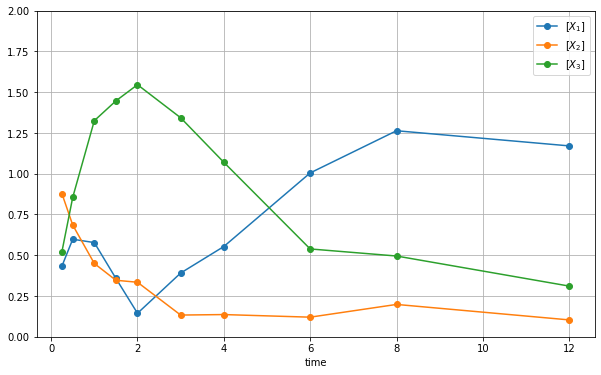

In [3]:
t_data = np.array([0.25, 0.5, 1, 1.5, 2, 3, 4, 6, 8, 12]) # time points
Y_data = np.array([
    [0.43363251, 0.87767177, 0.52257947],
    [0.59829549, 0.68515400, 0.85511583],
    [0.57771761, 0.44965359, 1.32524242],
    [0.35806804, 0.34666734, 1.44662417],
    [0.14424849, 0.33451828, 1.54588553],
    [0.39095813, 0.13332767, 1.34309046],
    [0.55361681, 0.13633700, 1.07001529],
    [1.00481754, 0.12037373, 0.53871530],
    [1.26352803, 0.19847235, 0.49535966],
    [1.17064081, 0.10360132, 0.31091261]])

plt.figure(figsize=(10,6))
plt.plot(t_data, Y_data, marker = "o")
plt.legend(('$[X_1]$', '$[X_2]$', '$[X_3]$'))
plt.xlabel('time')
plt.ylim(0,2)
plt.grid()
plt.show()

## 1. Alternative models

Again we use notation $\textbf{x}(t) = [x_1(t),\ x_2(t),\ x_3(t)]^{\top}$ where  $x_1 = [X_1]$, $x_2 = [X_2]$ and $x_3 = [X_3]$. The goal of the exercise is to try and infer which genes might be regulating which. This is done by comparing different alternative models. A model $M$ is represented by a $3 \times 3$ binary matrix, where for all $j,k = 1,2,3$,

*  If $M_{jk}$ is 1, then $X_k$ is somehow regulating $X_j$ 
*  If $M_{jk}$ is 0, then $X_k$ is not regulating $X_j$ 


We model the requlation as a linear differential equation

\begin{align*}
\frac{\text{d} \textbf{x}(t)}{\text{d} t} = A^M \textbf{x}(t) + \textbf{b}
\end{align*}

where $\textbf{b}= [b_1, b_2, b_3]^\top$ are the basal activation rates and $A^M$ is a 3 x 3 matrix in which the location of zero entries is specified by model $M$. Namely,

*  If $M_{jk}$ is 1, $A^M_{jk}$ is a regulation parameter, included in parameter vector $\theta_M$
*  If $M_{jk}$ is 0, $A^M_{jk}$ = 0

Additionally the basal rates $b_j$ are always included in the parameter vector $\theta_M$. 

**Example:** The full model where $M$ is a matrix of ones, length of $\theta_M$ is $3 \times 3 +3 = 12$

**Example:** In the empty model where $M$ is a matrix of ones, length of $\theta_M$ is $0 + 3 = 3$ 

Fill in the below function that given the model matrix $M$ and parameter vector $\theta_M$, returns the matrix $A_M$ and vector **b**. The order of the parameters in $\theta_M$ doesn't matter, as long as you are consistent in all remaining exercises.

In [4]:
# theta (b1, b2, b3, ..., theta_ij)
def create_A_b(M, theta):
    """"Create matrix A_M and vector b.
    
    :param M: a binary numpy array with shape (3,3)
    :param theta: a list with lenght equal to 3 + number of ones in M
    :returns: A = numpy array with shape (3,3) and b = numpy array with shape (3,1).
    Data type of returned arrays must be float.
    """
    A = np.zeros((3,3))
    b = np.zeros((3,1))
    theta_counter = 0
    b = np.array(theta[:3])
    A_m = theta[3:]
    for i in range(3):
        for j in range(3):
            if M[i][j] == 1:
                A[i][j] = A_m[theta_counter]
                theta_counter +=1
            elif M[i][j] == 0:
                A[i][j] = 0.0
    #print(A.dtype) - float64
    #print(b.dtype) - float64
    return A, b

M = [[0,1,1], [1,0,1], [1,0,1]]
theta = [4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0]
create_A_b(M, theta)

(array([[ 0.,  7.,  8.],
        [ 9.,  0., 10.],
        [11.,  0., 12.]]),
 array([4., 5., 6.]))

## 2. Solving the system

Complete the below function which for given model $M$, parameter vector $\theta_M$, and output time points $t_i$, and initial value $\textbf{x}(0) = [0, 1, 0]^{\top}$, solves all $\textbf{x}(t_i)$. *Hint:* this is a linear ODE so it can be solved similarly as in Exercise 3.

In [5]:
def find_steady(A, b):
    return np.linalg.solve(A, -b).reshape(-1,1)

In [6]:
x_init = np.array([[0,1.0,0]]).T

# x_init, t_data, and Y_data are global variables which can be used inside
# functions and should nnot be overwritten by your code

def solve_system(M, theta, t):
    """"Solve dynamics of model M with parameters theta.
    
    :param M: a binary numpy array with shape (3,3)
    :param theta: a list with lenght equal to 3 + number of ones in M
    :param t: a one-dimensional numpy array containing output time points t_i
    :returns: a numpy array with shape (len(t),3), containing solutions x(t_i) as rows
    """
    A, b = create_A_b(M, theta)
    y_steady = find_steady(A, b)
    y = np.zeros((len(t), 3))
    for i in range(len(t)):
        y[i] = (y_steady + (expm(A*t[i])@(x_init - y_steady))).T
    return y

M = [[0,1,1], [1,0,1], [1,0,1]]
theta = [4,4,4,4,4,4,4,4,1]
solve_system(M, theta, t_data)

array([[4.31157201e+00, 4.67945145e+00, 2.89475672e+00],
       [2.66345891e+01, 2.67699244e+01, 1.85204662e+01],
       [8.07957285e+02, 8.07975601e+02, 5.60301261e+02],
       [2.38976656e+04, 2.38976680e+04, 1.65616537e+04],
       [7.06144299e+05, 7.06144300e+05, 4.89358967e+05],
       [6.16505706e+08, 6.16505706e+08, 4.27238744e+08],
       [5.38245176e+11, 5.38245176e+11, 3.73004159e+11],
       [4.10266669e+17, 4.10266669e+17, 2.84314994e+17],
       [3.12717600e+23, 3.12717600e+23, 2.16713443e+23],
       [1.81687272e+35, 1.81687272e+35, 1.25909364e+35]])

## 3. Likelihood

We assume that the initial values $\textbf{x}(0) = [0, 1, 0]^{\top}$ are known, but the $N$ observations in `Y_data` are noisy observations of $\textbf{x}(t)$ at the time points `t_data`. 

Let $\mu_{ij} = x_{j}(t_i \mid M, \theta_M)$ be the solution of the system defined by model $M$ and parameters $\theta_M$, for gene $X_j$ at time $t_i$. To fit models, we define the likelihood function

\begin{align*}
\mathcal{L}(\theta) = \prod_{i=1}^N \prod_{j=1}^3 \mathcal{N}(y_{ij} \mid \mu_{ij}, \sigma^2) = \prod_{i=1}^N \prod_{j=1}^3 \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{1}{2 \sigma^2} \left(y_{ij} - \mu_{ij} \right)^2 }
\end{align*}

**a)** Complete the below function that computes the log-likelihood of model $M$, given parameter values $\theta_M$. From now on you can assume that the noise magnitude $\sigma$ is known and has value 0.15.

\begin{align*}
\text{LL}(\theta) = \log \mathcal{L}(\theta)= \sum_{i=1}^N \sum_{j=1}^3 \left[ - \log (\sigma \sqrt{2 \pi}) - \frac{1}{2 \sigma^2} \left(y_{ij} - \mu_{ij} \right)^2 \right]
\end{align*}

In [7]:
noise = 0.15
N = len(Y_data)

def log_likelihood(M, theta):
    """"Compute log-likelihood of model M with parameters theta.
    
    :param M: a binary numpy array with shape (3,3)
    :param theta: a list with lenght equal to 3 + number of ones in M
    :returns: one number
    """
    log_lik = [] # todo
    
    mu = solve_system(M, theta, t_data)
    
    for i in range(N):
        log_lik_1 = []
        for j in range(3):
            log_lik_1.append(-math.log(noise * math.sqrt(2*math.pi)) - ((Y_data[i][j] - mu[i][j])**2) / (2*noise**2))
        log_lik.append(sum(log_lik_1))
    return(sum(log_lik))

M = [[0,1,1], [1,0,1], [1,0,1]]
theta = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0]
log_likelihood(M, theta)

-14347631911.435833

**b)** If you drop all terms from $\text{LL}(\theta)$ that do not depend on $\theta$, you are left with a function that is a sum of squared errors, and has its maximum at the same point as $\text{LL}(\theta)$. Complete the below python function which returns all residuals $y_{ij} - \mu_{ij}$, given model $M$ and parameters $\theta_M$.

In [8]:
def residuals(M, theta):
    """"Input function for least-squares optimization.
    
    :param M: a binary numpy array with shape (3,3)
    :param theta: a list with lenght equal to 3 + number of ones in M
    :returns: vector of all residuals (y_ij - mu_ij), has shape (3*N, ) 
    """
    mu = solve_system(M, theta, t_data)
    residuals = [] # todo
    for i in range(N):
        for j in range(3):
            residuals.append(Y_data[i][j] - mu[i][j])
    return residuals

## 4. Marginal likelihood approximation

**a)** Complete the below function which finds the maximum likelihood parameters of model $M$. Use [scipy.optimize.least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html). Draw the initial guess for all parameter values from normal distribution with mean $0.05$ and standard deviation $0.01$.

In [9]:
def fit_model(M):
    """"Find maximum likelihood parameters for model M.
    
    :param M: a binary numpy array with shape (3,3)
    :returns: maximum likelihood parameters, a list with lenght equal to 3 + number of ones in M 
    """
    d = 3
    for i in range(3):
        for j in range(3):
            if M[i][j] == 1:
                d += 1
    theta_0 = np.random.normal(loc=0.05, scale=0.01, size=d) # todo
    residual_fun_M = lambda theta: residuals(M, theta)
    fmin = least_squares(residual_fun_M, theta_0)
    print(fmin.message)
    return fmin.x # todo

**b)** Complete the below function which returns the BIC approximation for log marginal likelihood of model $M$.

In [10]:
def BIC(M, theta_ML):
    """"Bayesian Information Criterion approximation for log marginal likelihood of M.
    
    :param M: a binary numpy array with shape (3,3)
    :param theta_ML: maximum likelihood parameters for model M, a list with 
    lenght equal to 3 + number of ones in M
    :returns: one number
    """
    bic = -len(theta_ML)*math.log(N)/2 + log_likelihood(M, theta_ML) # todo
    return(bic)

M = [[1,0,0], [0,1,0], [0,0,1]]
theta_ML = fit_model(M)
BIC(M, theta_ML)

`ftol` termination condition is satisfied.


-30.684422656437878

## 5. Finding the best network structure

**a)** How many different models $A_M$ are there? 

In total, there are $2^{n^2}=2^{3^2} = 2^{9}$ models

But the point of the matrix M is that the entry $M_{ij}=1$ means $X_i$ molucule is regulated by $X_j$ molecule, so $M_{ii}$ should be always 1, otherwise it does not really make sense. So, the number of all reasonable M matrices is smaller ($2^{6}$).

**b)** Compute the BIC for at least the following models

\begin{align*}
M_{diag} = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix} \hspace{1cm}
M_{full} = 
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix} \hspace{1cm}
M_{cross} = 
\begin{bmatrix}
1 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 1 \\
\end{bmatrix} \hspace{1cm}
M_{test} = 
\begin{bmatrix}
1 & 0 & 1 \\
0 & 1 & 0 \\
1 & 1 & 1 \\
\end{bmatrix}
\end{align*}

and use the below plotting function to vizualize their fit.

**c)** What is the best model you find and what genes are regulating each other in it? Can you find an even better model than one any of the above?

In [11]:
def plot_fit(M, theta_ML):
    """"Visualize maximum likelihood fit of model M.
    
    :param M: a binary numpy array with shape (3,3)
    :param theta_ML: maximum likelihood parameters for model M, a list with 
    lenght equal to 3 + number of ones in M
    :returns: nothing
    """
    ttt = np.linspace(0, max(t_data), 100)
    mu = solve_system(M, theta_ML, ttt)
    plt.figure(figsize=(10,6))
    LL = log_likelihood(M, theta_ML)
    bic = BIC(M, theta_ML)
    cols = ["#e41a1c", "#377eb8", "#4daf4a"]
    for j in range(0, 3):
        plt.plot(ttt, mu[:,j], color = cols[j])
        plt.plot(t_data, Y_data[:,j], marker = "o", color = cols[j], linestyle = "none")
    plt.legend(('X1_fit', 'X1_data', 'X2_fit', 'X2_data', 'X3_fit', 'X3_data'))
    plt.title("LL = " + str(round(LL, 3)) + ", BIC = " + str(round(bic, 3)))
    plt.show()

`ftol` termination condition is satisfied.


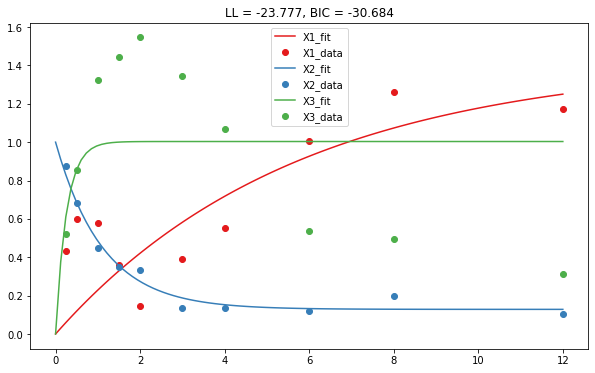

In [12]:
M1 = [[1,0,0], [0,1,0], [0,0,1]]
theta_ML_1 = fit_model(M1)
plot_fit(M1, theta_ML_1)

`ftol` termination condition is satisfied.


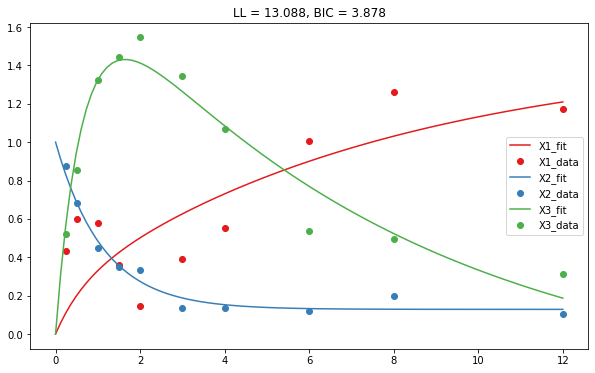

In [13]:
M2 = [[1,0,1], [0,1,0], [1,0,1]]
theta_ML_2 = fit_model(M2)
plot_fit(M2, theta_ML_2)

`ftol` termination condition is satisfied.


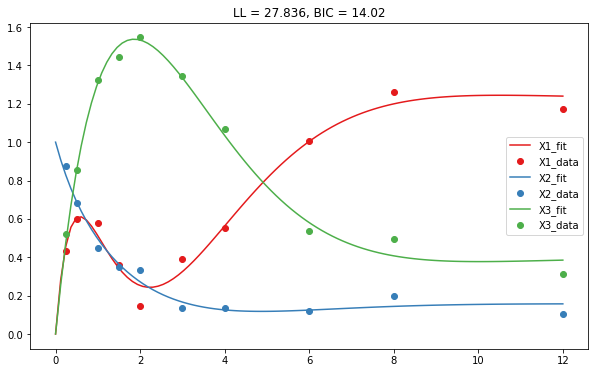

In [14]:
M3 = [[1,1,1], [1,1,1], [1,1,1]]
theta_ML_3 = fit_model(M3)
plot_fit(M3, theta_ML_3)

`ftol` termination condition is satisfied.


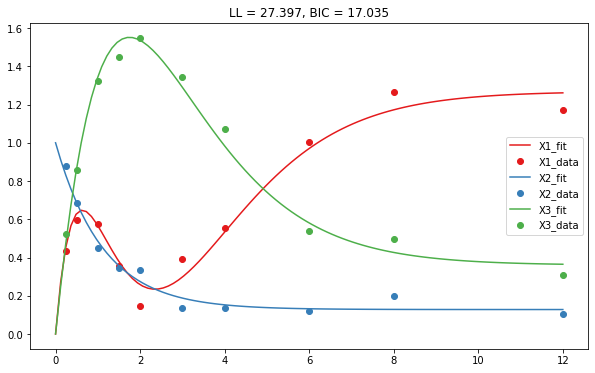

In [15]:
M4 = [[1,0,1], [0,1,0], [1,1,1]]
theta_ML_4 = fit_model(M4)
plot_fit(M4, theta_ML_4)

As can be seen from the figures, the higher BIC corresponds to the better model. The best model is the model with $M_{test}$ as it has the biggest BIC. $X_1$ is regulating $X_3$ and vice versa, $X_2$ is regulating $X_3$

I think it does not really make sense to find better model, because $M_{test}$ fits really well to the data, and overfitting the model is not good as well.